In [3]:
!pip install pandas scikit-learn joblib



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [6]:
df = pd.read_csv(r'D:\xamp\htdocs\BloomWell\balanced_mental_health_dataset.csv')
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head(3)


Shape: (192000, 32)
Columns: ['PHQ9_Item_1', 'PHQ9_Item_2', 'PHQ9_Item_3', 'PHQ9_Item_4', 'PHQ9_Item_5', 'PHQ9_Item_6', 'PHQ9_Item_7', 'PHQ9_Item_8', 'PHQ9_Item_9', 'GAD7_Item_1', 'GAD7_Item_2', 'GAD7_Item_3', 'GAD7_Item_4', 'GAD7_Item_5', 'GAD7_Item_6', 'GAD7_Item_7', 'PHQ9_Total', 'PHQ9_Severity', 'GAD7_Total', 'GAD7_Severity', 'Age_Group', 'Gender', 'Employment_Status', 'Physical_Activity', 'Social_Interaction', 'Chronic_Health_Conditions', 'Medication_Usage', 'Sleep_Quality', 'Stress_Level', 'Substance_Use', 'Mood_Rating', 'Sleep_Hours']


,PHQ9_Item_1,PHQ9_Item_2,PHQ9_Item_3,PHQ9_Item_4,PHQ9_Item_5,PHQ9_Item_6,PHQ9_Item_7,PHQ9_Item_8,PHQ9_Item_9,GAD7_Item_1,...,Employment_Status,Physical_Activity,Social_Interaction,Chronic_Health_Conditions,Medication_Usage,Sleep_Quality,Stress_Level,Substance_Use,Mood_Rating,Sleep_Hours
0,0,1,0,0,0,0,0,2,0,1,...,Unemployed,5.0,5.0,0,0,3.0,3.0,NaN,9.0,6.6
1,0,0,0,0,0,0,2,0,0,2,...,Unemployed,4.0,4.0,0,0,5.0,2.0,NaN,8.0,7.9
2,0,1,0,0,0,0,0,0,0,1,...,Unemployed,5.0,5.0,0,0,5.0,1.0,NaN,8.0,6.2


In [10]:
phq_cols = [f'PHQ9_Item_{i}' for i in range(1, 10)]
gad_cols = [f'GAD7_Item_{i}' for i in range(1, 8)]
demo_cols = [
    'Age_Group', 'Gender', 'Employment_Status', 'Physical_Activity', 'Social_Interaction',
    'Chronic_Health_Conditions', 'Medication_Usage', 'Sleep_Quality', 'Stress_Level',
    'Substance_Use', 'Mood_Rating', 'Sleep_Hours'
]

feature_cols = phq_cols + gad_cols + demo_cols
target = 'PHQ9_Severity'


In [11]:
df_encoded = df.copy()
for col in demo_cols:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

le_target = LabelEncoder()
df_encoded[target] = le_target.fit_transform(df_encoded[target])


In [12]:
X = df_encoded[feature_cols]
y = df_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [14]:
#Phase 2: Train & Evaluate All Valid ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [15]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Neural Network (MLP)": MLPClassifier(max_iter=300)
}


In [19]:
import warnings
warnings.filterwarnings("ignore", message="Could not find the number of physical cores")



=== Logistic Regression ===
Accuracy: 1.0000
Precision (macro): 1.0000
Recall (macro): 1.0000
F1 Score (macro): 1.0000

Classification Report:
                   precision    recall  f1-score   support

             Mild       1.00      1.00      1.00      7680
          Minimal       1.00      1.00      1.00      7680
         Moderate       1.00      1.00      1.00      7680
Moderately Severe       1.00      1.00      1.00      7680
           Severe       1.00      1.00      1.00      7680

         accuracy                           1.00     38400
        macro avg       1.00      1.00      1.00     38400
     weighted avg       1.00      1.00      1.00     38400

Confusion Matrix:


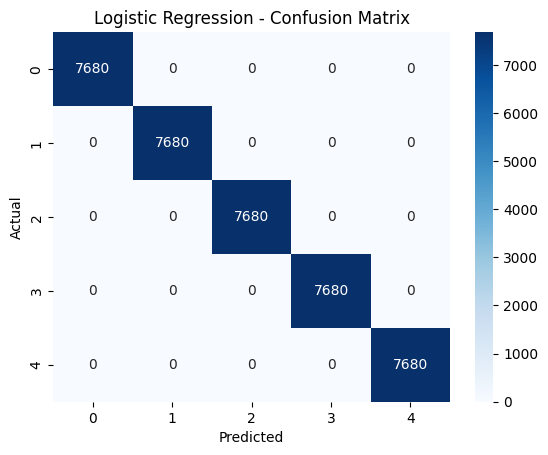


=== Support Vector Machine ===
Accuracy: 1.0000
Precision (macro): 1.0000
Recall (macro): 1.0000
F1 Score (macro): 1.0000

Classification Report:
                   precision    recall  f1-score   support

             Mild       1.00      1.00      1.00      7680
          Minimal       1.00      1.00      1.00      7680
         Moderate       1.00      1.00      1.00      7680
Moderately Severe       1.00      1.00      1.00      7680
           Severe       1.00      1.00      1.00      7680

         accuracy                           1.00     38400
        macro avg       1.00      1.00      1.00     38400
     weighted avg       1.00      1.00      1.00     38400

Confusion Matrix:


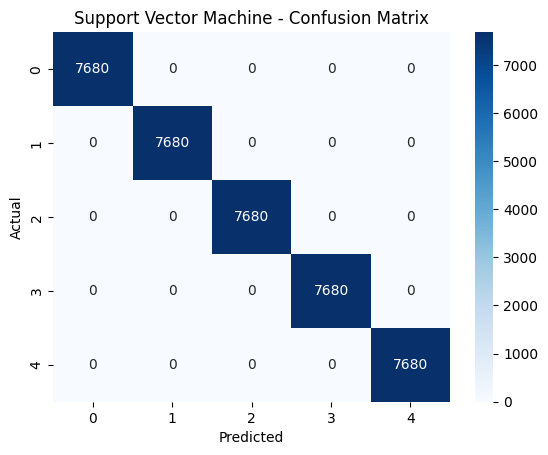


=== Random Forest ===
Accuracy: 0.9012
Precision (macro): 0.9031
Recall (macro): 0.9012
F1 Score (macro): 0.9018

Classification Report:
                   precision    recall  f1-score   support

             Mild       0.88      0.90      0.89      7680
          Minimal       0.97      0.95      0.96      7680
         Moderate       0.84      0.85      0.84      7680
Moderately Severe       0.84      0.89      0.86      7680
           Severe       0.97      0.92      0.94      7680

         accuracy                           0.90     38400
        macro avg       0.90      0.90      0.90     38400
     weighted avg       0.90      0.90      0.90     38400

Confusion Matrix:


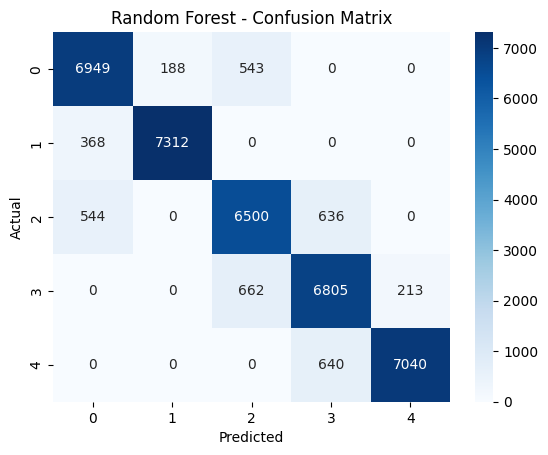


=== Gradient Boosting ===
Accuracy: 0.8825
Precision (macro): 0.8850
Recall (macro): 0.8825
F1 Score (macro): 0.8833

Classification Report:
                   precision    recall  f1-score   support

             Mild       0.86      0.89      0.87      7680
          Minimal       0.98      0.94      0.96      7680
         Moderate       0.81      0.80      0.81      7680
Moderately Severe       0.81      0.87      0.84      7680
           Severe       0.97      0.91      0.94      7680

         accuracy                           0.88     38400
        macro avg       0.88      0.88      0.88     38400
     weighted avg       0.88      0.88      0.88     38400

Confusion Matrix:


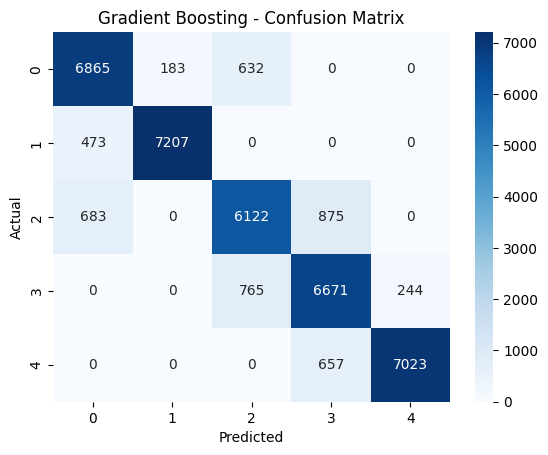


=== Decision Tree ===
Accuracy: 0.7867
Precision (macro): 0.7855
Recall (macro): 0.7867
F1 Score (macro): 0.7861

Classification Report:
                   precision    recall  f1-score   support

             Mild       0.76      0.77      0.76      7680
          Minimal       0.92      0.93      0.92      7680
         Moderate       0.67      0.66      0.67      7680
Moderately Severe       0.70      0.69      0.70      7680
           Severe       0.87      0.88      0.87      7680

         accuracy                           0.79     38400
        macro avg       0.79      0.79      0.79     38400
     weighted avg       0.79      0.79      0.79     38400

Confusion Matrix:


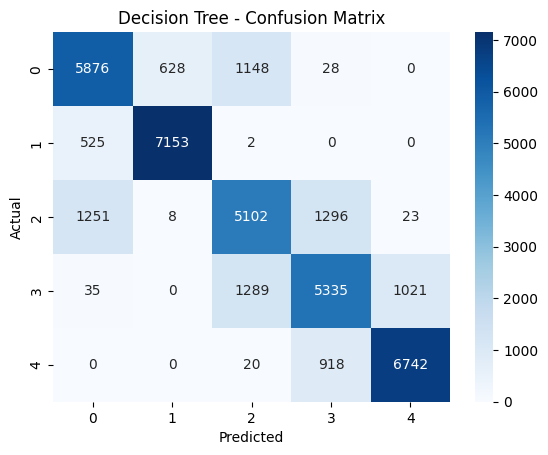


=== Naive Bayes ===
Accuracy: 0.8544
Precision (macro): 0.8638
Recall (macro): 0.8544
F1 Score (macro): 0.8566

Classification Report:
                   precision    recall  f1-score   support

             Mild       0.80      0.86      0.83      7680
          Minimal       0.97      0.87      0.92      7680
         Moderate       0.79      0.81      0.80      7680
Moderately Severe       0.78      0.89      0.83      7680
           Severe       0.99      0.85      0.91      7680

         accuracy                           0.85     38400
        macro avg       0.86      0.85      0.86     38400
     weighted avg       0.86      0.85      0.86     38400

Confusion Matrix:


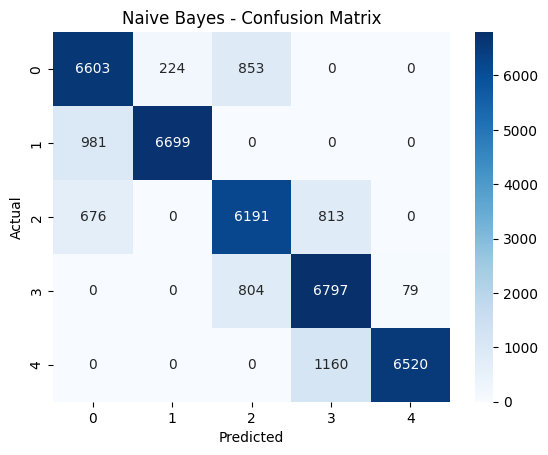


=== K-Nearest Neighbors ===


C:\Users\adan reyaz\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\adan reyaz\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\adan reyaz\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 556, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\adan reyaz\AppData\Local\Programs\Python\Python313\Lib\subpr

Accuracy: 0.8277
Precision (macro): 0.8260
Recall (macro): 0.8277
F1 Score (macro): 0.8247

Classification Report:
                   precision    recall  f1-score   support

             Mild       0.79      0.73      0.76      7680
          Minimal       0.82      0.97      0.89      7680
         Moderate       0.80      0.72      0.76      7680
Moderately Severe       0.82      0.78      0.80      7680
           Severe       0.89      0.94      0.92      7680

         accuracy                           0.83     38400
        macro avg       0.83      0.83      0.82     38400
     weighted avg       0.83      0.83      0.82     38400

Confusion Matrix:


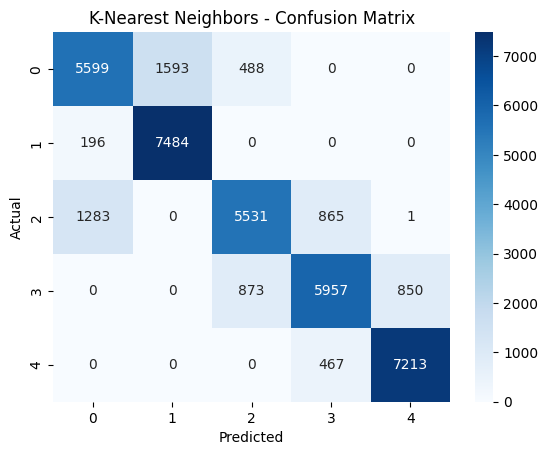


=== Neural Network (MLP) ===
Accuracy: 1.0000
Precision (macro): 1.0000
Recall (macro): 1.0000
F1 Score (macro): 1.0000

Classification Report:
                   precision    recall  f1-score   support

             Mild       1.00      1.00      1.00      7680
          Minimal       1.00      1.00      1.00      7680
         Moderate       1.00      1.00      1.00      7680
Moderately Severe       1.00      1.00      1.00      7680
           Severe       1.00      1.00      1.00      7680

         accuracy                           1.00     38400
        macro avg       1.00      1.00      1.00     38400
     weighted avg       1.00      1.00      1.00     38400

Confusion Matrix:


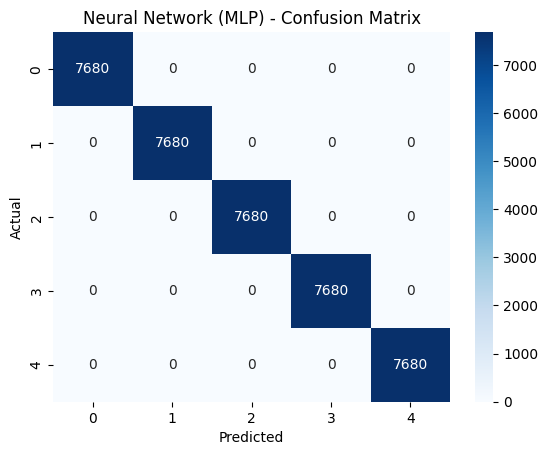

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,1.000000,1.000000,1.000000,1.000000
1,Support Vector Machine,1.000000,1.000000,1.000000,1.000000
7,Neural Network (MLP),1.000000,1.000000,1.000000,1.000000
2,Random Forest,0.901198,0.903051,0.901198,0.901807
3,Gradient Boosting,0.882500,0.884996,0.882500,0.883251
5,Naive Bayes,0.854427,0.863792,0.854427,0.856595
6,K-Nearest Neighbors,0.827708,0.825959,0.827708,0.824668
4,Decision Tree,0.786667,0.785510,0.786667,0.786056


In [16]:
results = []

for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision (macro): {prec:.4f}")
    print(f"Recall (macro): {rec:.4f}")
    print(f"F1 Score (macro): {f1:.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le_target.classes_))
    
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted'); plt.ylabel('Actual')
    plt.show()
    
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

df_results_before = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)
df_results_before


In [17]:
if target in X.columns:
    print("⚠️ Target column is in features! You must remove it.")
else:
    print("✅ Target is not in features.")


✅ Target is not in features.


In [21]:
df_results_before.to_csv("model_results_before_feature_selection.csv", index=False)

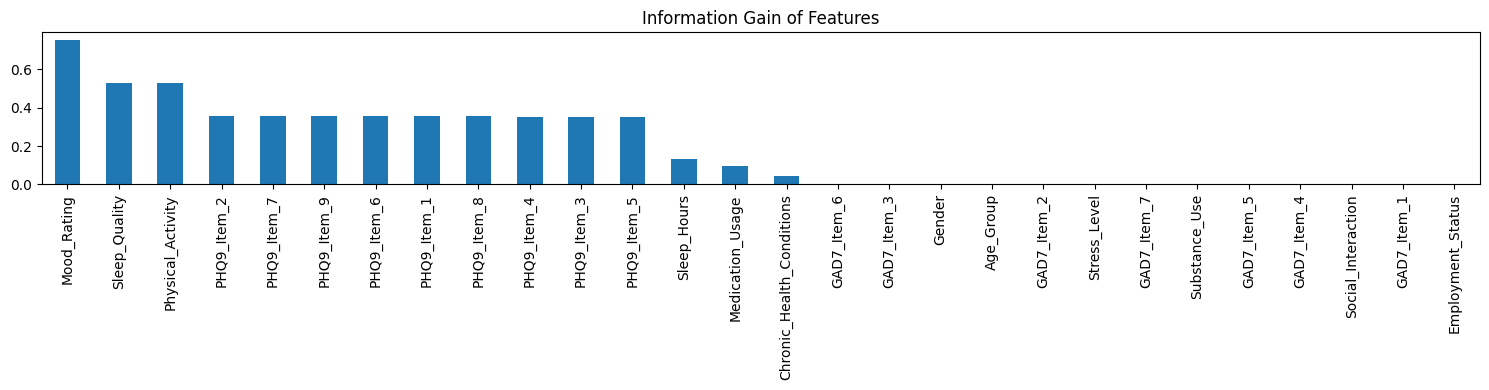

Top 10 Features: ['Mood_Rating', 'Sleep_Quality', 'Physical_Activity', 'PHQ9_Item_2', 'PHQ9_Item_7', 'PHQ9_Item_9', 'PHQ9_Item_6', 'PHQ9_Item_1', 'PHQ9_Item_8', 'PHQ9_Item_4']


In [22]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

selector = SelectKBest(score_func=mutual_info_classif, k='all')
selector.fit(X, y)
info_gain = pd.Series(selector.scores_, index=X.columns).sort_values(ascending=False)
info_gain.plot(kind='bar', figsize=(15, 4), title="Information Gain of Features")
plt.tight_layout()
plt.show()

top10_features = info_gain.head(10).index.tolist()
print("Top 10 Features:", top10_features)


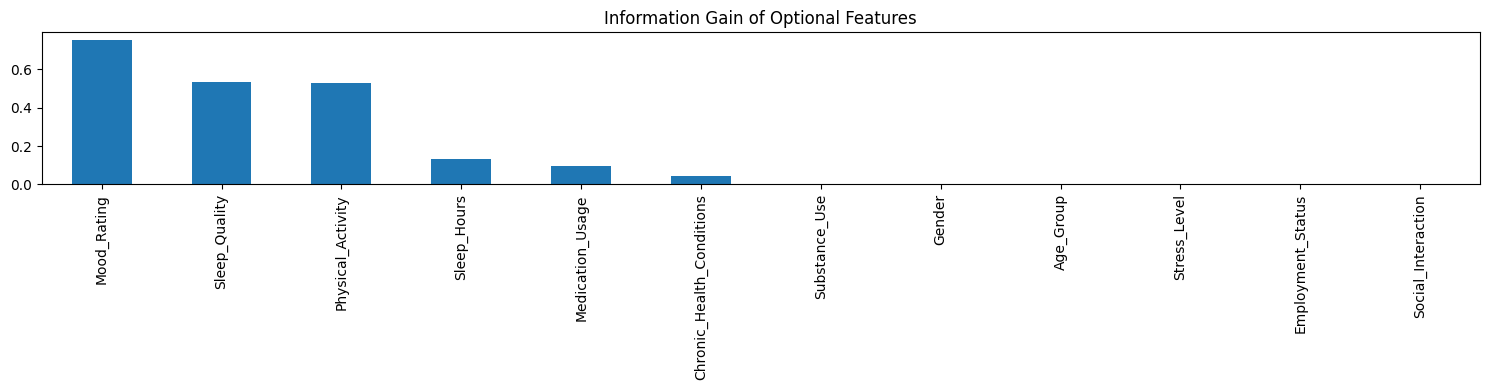

Final Selected Features: ['PHQ9_Item_1', 'PHQ9_Item_2', 'PHQ9_Item_3', 'PHQ9_Item_4', 'PHQ9_Item_5', 'PHQ9_Item_6', 'PHQ9_Item_7', 'PHQ9_Item_8', 'PHQ9_Item_9', 'GAD7_Item_1', 'GAD7_Item_2', 'GAD7_Item_3', 'GAD7_Item_4', 'GAD7_Item_5', 'GAD7_Item_6', 'GAD7_Item_7', 'Mood_Rating', 'Sleep_Quality', 'Physical_Activity', 'Sleep_Hours', 'Medication_Usage']


In [24]:
#since PHQ-9 AND GAD-7 scores are clinically madatory we use another approach
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Identify mandatory (clinically essential) features
phq_cols = [f'PHQ9_Item_{i}' for i in range(1, 10)]
gad_cols = [f'GAD7_Item_{i}' for i in range(1, 8)]
mandatory_features = phq_cols + gad_cols

# Step 2: Get the full list of optional features (exclude mandatory ones)
optional_features = [f for f in X.columns if f not in mandatory_features]

# Step 3: Apply Info Gain only on optional features
selector = SelectKBest(score_func=mutual_info_classif, k='all')
selector.fit(X[optional_features], y)

# Step 4: Rank optional features by score
info_gain = pd.Series(selector.scores_, index=optional_features).sort_values(ascending=False)

# Visualize
info_gain.plot(kind='bar', figsize=(15, 4), title="Information Gain of Optional Features")
plt.tight_layout()
plt.show()

# Step 5: Combine mandatory features with top optional ones (e.g., top 5)
top_optional_features = info_gain.head(5).index.tolist()
final_selected_features = mandatory_features + top_optional_features

print("Final Selected Features:", final_selected_features)


In [25]:
# Save selected features to a text file
with open("final_selected_features.txt", "w") as f:
    for feature in final_selected_features:
        f.write(f"{feature}\n")

print("✅ Saved final_selected_features.txt")


✅ Saved final_selected_features.txt


In [26]:
#phase 4
# Create a new DataFrame using selected features
X_selected = X[final_selected_features]  # final_selected_features = top10 + PHQ + GAD from Phase 3

# Re-split using same seed for consistency
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)


In [27]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize models
retrained_models = {
    "Random Forest (Selected)": RandomForestClassifier(random_state=42),
    "Gradient Boosting (Selected)": GradientBoostingClassifier(random_state=42),
    "Neural Network (MLP, Selected)": MLPClassifier(random_state=42, max_iter=500)
}

# Store results
results_after = []

# Train and evaluate
for name, model in retrained_models.items():
    model.fit(X_train_sel, y_train_sel)
    y_pred_sel = model.predict(X_test_sel)

    acc = accuracy_score(y_test_sel, y_pred_sel)
    precision = precision_score(y_test_sel, y_pred_sel, average='macro')
    recall = recall_score(y_test_sel, y_pred_sel, average='macro')
    f1 = f1_score(y_test_sel, y_pred_sel, average='macro')
    
    print(f"=== {name} ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision (macro): {precision:.4f}")
    print(f"Recall (macro): {recall:.4f}")
    print(f"F1 Score (macro): {f1:.4f}\n")
    print("Classification Report:\n", classification_report(y_test_sel, y_pred_sel))

    results_after.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })


=== Random Forest (Selected) ===
Accuracy: 0.9098
Precision (macro): 0.9112
Recall (macro): 0.9098
F1 Score (macro): 0.9102

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91      7680
           1       0.98      0.96      0.97      7680
           2       0.85      0.85      0.85      7680
           3       0.85      0.89      0.87      7680
           4       0.97      0.93      0.95      7680

    accuracy                           0.91     38400
   macro avg       0.91      0.91      0.91     38400
weighted avg       0.91      0.91      0.91     38400

=== Gradient Boosting (Selected) ===
Accuracy: 0.8825
Precision (macro): 0.8850
Recall (macro): 0.8825
F1 Score (macro): 0.8833

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      7680
           1       0.98      0.94      0.96      7680
           2       0.81      0.80      0.81   

In [29]:
import pandas as pd

df_results_after = pd.DataFrame(results_after)
df_results_after.to_csv("model_results_after_feature_selection.csv", index=False)

# Optional: Display the dataframe
df_results_after


,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest (Selected),0.909766,0.911202,0.909766,0.910234
1,Gradient Boosting (Selected),0.882500,0.884996,0.882500,0.883251
2,"Neural Network (MLP, Selected)",1.000000,1.000000,1.000000,1.000000


In [30]:
#phase 5

In [31]:
# Add 'Phase' tag for clarity
df_results_before['Phase'] = 'Before Feature Selection'
df_results_after['Phase'] = 'After Feature Selection'

# Combine them
df_comparison = pd.concat([df_results_before, df_results_after], ignore_index=True)
df_comparison.to_csv("model_comparison_summary.csv", index=False)
df_comparison


,Model,Accuracy,Precision,Recall,F1 Score,Phase
0,Logistic Regression,1.000000,1.000000,1.000000,1.000000,Before Feature Selection
1,Support Vector Machine,1.000000,1.000000,1.000000,1.000000,Before Feature Selection
2,Neural Network (MLP),1.000000,1.000000,1.000000,1.000000,Before Feature Selection
3,Random Forest,0.901198,0.903051,0.901198,0.901807,Before Feature Selection
4,Gradient Boosting,0.882500,0.884996,0.882500,0.883251,Before Feature Selection
5,Naive Bayes,0.854427,0.863792,0.854427,0.856595,Before Feature Selection
6,K-Nearest Neighbors,0.827708,0.825959,0.827708,0.824668,Before Feature Selection
7,Decision Tree,0.786667,0.785510,0.786667,0.786056,Before Feature Selection
8,Random Forest (Selected),0.909766,0.911202,0.909766,0.910234,After Feature Selection
9,Gradient Boosting (Selected),0.882500,0.884996,0.882500,0.883251,After Feature Selection


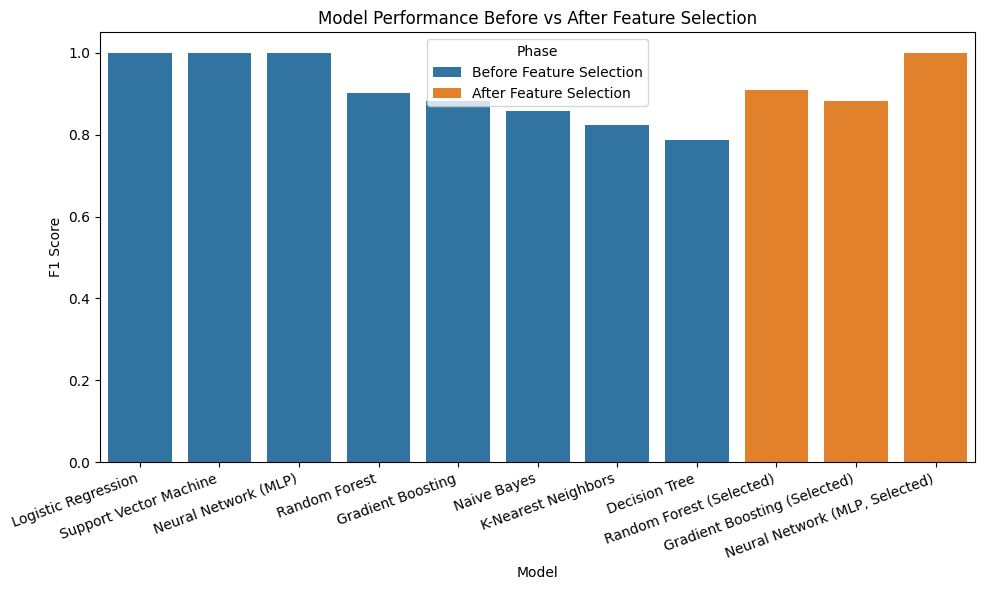

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=df_comparison, x='Model', y='F1 Score', hue='Phase')
plt.xticks(rotation=20, ha='right')
plt.title("Model Performance Before vs After Feature Selection")
plt.tight_layout()
plt.show()


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib
import os

# === Load dataset ===
df = pd.read_csv("D:/xamp/htdocs/BloomWell/balanced_mental_health_dataset.csv")

# === Selected features based on information gain ===
selected_features = [
    'PHQ9_Item_1', 'PHQ9_Item_2', 'PHQ9_Item_3', 'PHQ9_Item_4', 'PHQ9_Item_5',
    'PHQ9_Item_6', 'PHQ9_Item_7', 'PHQ9_Item_8', 'PHQ9_Item_9',
    'GAD7_Item_1', 'GAD7_Item_2', 'GAD7_Item_3', 'GAD7_Item_4', 'GAD7_Item_5',
    'GAD7_Item_6', 'GAD7_Item_7',
    'Mood_Rating', 'Sleep_Quality', 'Physical_Activity', 'Sleep_Hours', 'Medication_Usage'
]

# === Targets ===
X = df[selected_features]
y_dep = df['PHQ9_Severity']
y_anx = df['GAD7_Severity']

# === Train-Test Split ===
X_train_dep, _, y_train_dep, _ = train_test_split(X, y_dep, test_size=0.2, random_state=42)
X_train_anx, _, y_train_anx, _ = train_test_split(X, y_anx, test_size=0.2, random_state=42)

# === Train models ===
rf_dep = RandomForestClassifier(n_estimators=100, random_state=42)
rf_anx = RandomForestClassifier(n_estimators=100, random_state=42)

rf_dep.fit(X_train_dep, y_train_dep)
rf_anx.fit(X_train_anx, y_train_anx)

# === Save to BloomWell directory ===
model_dir = "D:/xamp/htdocs/BloomWell/models"
os.makedirs(model_dir, exist_ok=True)

joblib.dump(rf_dep, os.path.join(model_dir, "rf_depression_model.pkl"))
joblib.dump(rf_anx, os.path.join(model_dir, "rf_anxiety_model.pkl"))

print("✅ Models trained and saved successfully.")


✅ Models trained and saved successfully.


In [38]:
print("Model expects:", rf_dep.feature_names_in_)


Model expects: ['PHQ9_Item_1' 'PHQ9_Item_2' 'PHQ9_Item_3' 'PHQ9_Item_4' 'PHQ9_Item_5'
 'PHQ9_Item_6' 'PHQ9_Item_7' 'PHQ9_Item_8' 'PHQ9_Item_9' 'GAD7_Item_1'
 'GAD7_Item_2' 'GAD7_Item_3' 'GAD7_Item_4' 'GAD7_Item_5' 'GAD7_Item_6'
 'GAD7_Item_7' 'Mood_Rating' 'Sleep_Quality' 'Physical_Activity'
 'Sleep_Hours' 'Medication_Usage']
